# 2-D Ising Model

We will investigate the 2-d Ising model with Monte Carlo methods. Since there are many internal iterations, it is much faster to run in `C++` with `swig`. 

### Compile with swig

In [21]:
! swig -c++ -python swig/ising.i
! python swig/setup_ising.py build_ext --inplace

ising.cpp
ising_wrap.cxx
   Creating library build\temp.win-amd64-cpython-313\Release\_ising.cp313-win_amd64.lib and object build\temp.win-amd64-cpython-313\Release\_ising.cp313-win_amd64.exp
Generating code
Finished generating code


cl : Command line warning D9002 : ignoring unknown option '-std=c++11'
cl : Command line warning D9002 : ignoring unknown option '-O3'
cl : Command line warning D9002 : ignoring unknown option '-std=c++11'
cl : Command line warning D9002 : ignoring unknown option '-O3'
error: could not delete '_ising.cp313-win_amd64.pyd': Access is denied


### Import from swig

In [22]:
import sys
import os
sys.path.append( os.path.abspath("swig") )
import ising
import numpy as np
import matplotlib.pyplot as plt

### Initialize the system

In [23]:
L = 10
J = 1.0
N = 100
T = 1.
H = 0.
MCSteps = 1000


### Run the simulations for various temperatures


Also plot the average magnetization as a function of the MC step. 

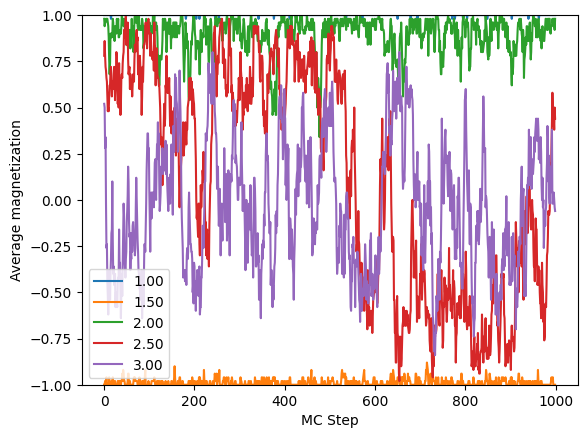

In [24]:
eAvgVals = []
mAvgVals = []
Tvals = np.linspace(1,3,5)
for T in Tvals:
    i = ising.Ising(J, L, N, T, H)
    i.run(MCSteps)
    mvals = i.get_mvals()
    plt.plot(mvals, label="%3.2f" % (T))
    eAvgVals.append( i.get_eAvg() )
    mAvgVals.append( i.get_mAvg() )

plt.legend()
plt.ylim(-1,1)
plt.xlabel("MC Step")
plt.ylabel("Average magnetization")
plt.show()

### Plot average magnetization versus temperature

Text(0, 0.5, 'Average Magnetization')

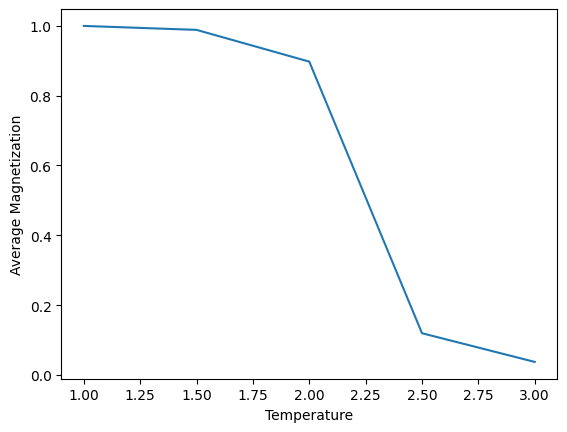

In [25]:
plt.plot(Tvals, np.abs(mAvgVals))
plt.xlabel("Temperature")
plt.ylabel("Average Magnetization")

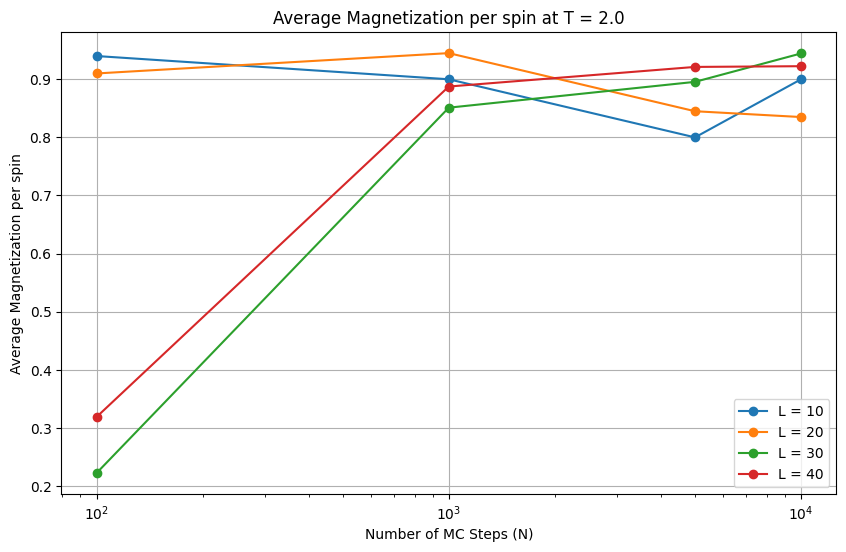

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from ising import Ising  # your SWIG wrapper

# Parameters
T = 2.0
L_values = [10, 20, 30, 40]       # Different lattice sizes
N_values = [100, 1000, 5000, 10000]  # Different number of MC steps

# Setup plot
plt.figure(figsize=(10, 6))

for L in L_values:
    avg_magnetizations = []
    for N in N_values:
        model = Ising(iJ=1.0, iL=L, iN=L*L, iT=T)
        model.run(N)  # Run N steps
        m_avg = np.abs(model.magnetizationPerSpin())  # Take absolute value
        avg_magnetizations.append(m_avg)
    
    # Plot for each L
    plt.plot(N_values, avg_magnetizations, 'o-', label=f'L = {L}')

plt.xscale('log')  # Log scale for N axis (optional but looks nice)
plt.xlabel('Number of MC Steps (N)')
plt.ylabel('Average Magnetization per spin')
plt.title(f'Average Magnetization per spin at T = {T}')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# A reasonable value for N appears to be 1000.

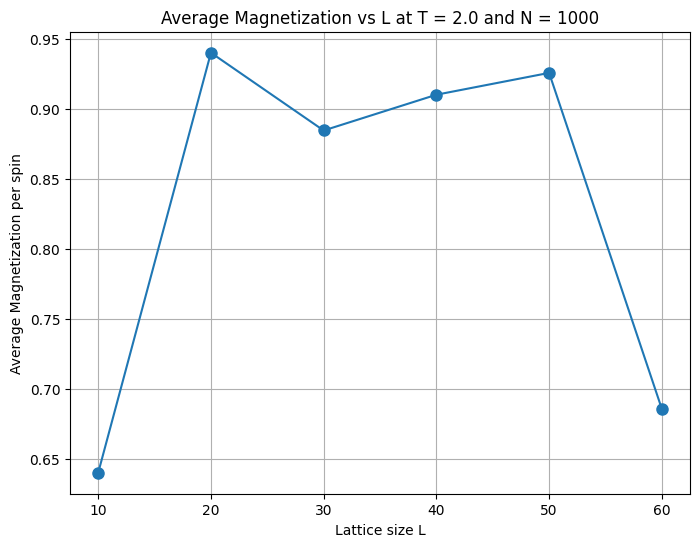

In [44]:
# Average magnetization at various L with N=1000
import numpy as np
import matplotlib.pyplot as plt
from ising import Ising

# Parameters
T = 2.0
N_steps = 1000  # Fixed number of MC steps
L_values = [10, 20, 30, 40, 50, 60]  # Different lattice sizes

# Lists to collect results
avg_magnetizations = []

for L in L_values:
    model = Ising(iJ=1.0, iL=L, iN=L*L, iT=T)
    model.run(N_steps)  # Run 1000 MC steps
    m_avg = np.abs(model.magnetizationPerSpin())
    avg_magnetizations.append(m_avg)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(L_values, avg_magnetizations, 'o-', markersize=8)
plt.xlabel('Lattice size L')
plt.ylabel('Average Magnetization per spin')
plt.title(f'Average Magnetization vs L at T = {T} and N = {N_steps}')
plt.grid(True)
plt.show()


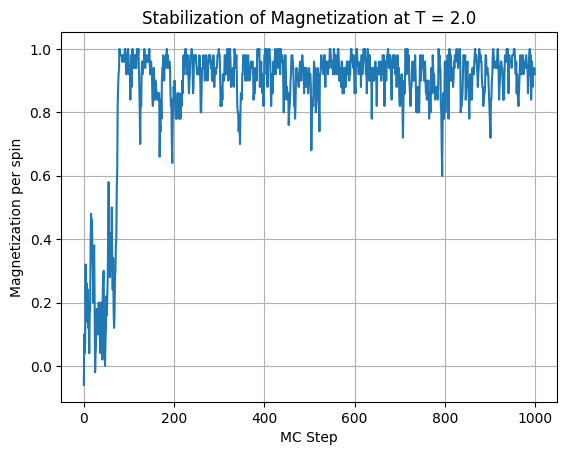

In [45]:
# Part A
# Using 30 as a good value of L
import numpy as np
import matplotlib.pyplot as plt
from ising import Ising

# Parameters
L = 10
N = L * L
T = 2.0
MCSteps = 1000  # total MC steps to observe stabilization

# Create Ising model
model = Ising(iJ=1.0, iL=L, iN=N, iT=T)

# Track magnetization at each step
magnetizations = []

for step in range(MCSteps):
    model.one_monte_carlo_step_per_spin()  # one full sweep
    m = model.magnetizationPerSpin()
    magnetizations.append(m)

# Plot
plt.plot(magnetizations)
plt.xlabel('MC Step')
plt.ylabel('Magnetization per spin')
plt.title(f'Stabilization of Magnetization at T = {T}')
plt.grid(True)
plt.show()

Fitted Tc = 2.355
Fitted beta = 0.215


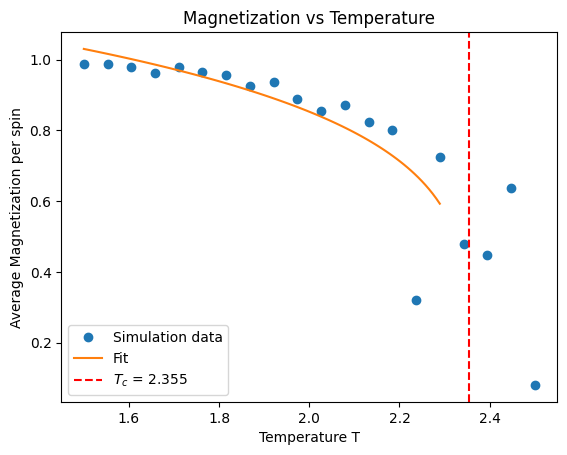

In [27]:
# Part B
from scipy.optimize import curve_fit

# Step 1: Define the fitting function
def magnetization_fit(T, Tc, beta, A):
    return A * (Tc - T)**beta

# Step 2: Set parameters
L = 30
N = 10000
T_values = np.linspace(1.5, 2.5, 20)  # 20 points from 1.5 to 2.5
magnetizations = []

# Step 3: Run simulations
for T in T_values:
    model = Ising(iJ=1.0, iL=L, iN=L*L, iT=T)
    model.run(N)
    m = np.abs(model.magnetizationPerSpin())
    magnetizations.append(m)

magnetizations = np.array(magnetizations)

# Step 4: Only fit where m is nonzero
# Only use points with T < 2.3 and positive magnetization
T_fit = T_values[(T_values < 2.3) & (magnetizations > 0)]
m_fit = magnetizations[(T_values < 2.3) & (magnetizations > 0)]

# Fit only safe data
popt, pcov = curve_fit(magnetization_fit, T_fit, m_fit, p0=[2.3, 0.125, 1.0])

# Fitted parameters
Tc_fit, beta_fit, A_fit = popt

print(f"Fitted Tc = {Tc_fit:.3f}")
print(f"Fitted beta = {beta_fit:.3f}")

# Step 6: Plot
plt.plot(T_values, magnetizations, 'o', label='Simulation data')
T_fine = np.linspace(min(T_fit), max(T_fit), 100)
plt.plot(T_fine, magnetization_fit(T_fine, *popt), '-', label='Fit')
plt.axvline(Tc_fit, color='r', linestyle='--', label=f'$T_c$ = {Tc_fit:.3f}')
plt.xlabel('Temperature T')
plt.ylabel('Average Magnetization per spin')
plt.title('Magnetization vs Temperature')
plt.legend()
plt.show()


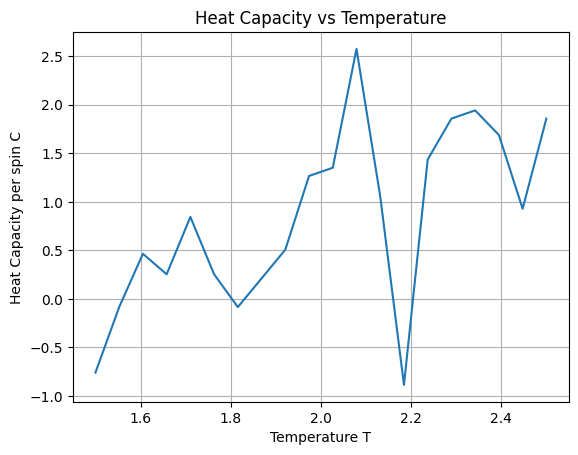

In [28]:
# Part C

# Step 1: Set parameters
L = 30
N = 10000
T_values = np.linspace(1.5, 2.5, 20)  # 20 temperatures
energies = []

# Step 2: Run simulations to collect energies
for T in T_values:
    model = Ising(iJ=1.0, iL=L, iN=L*L, iT=T)
    model.run(N)
    e = model.energyPerSpin()
    energies.append(e)

energies = np.array(energies)

# Step 3: Compute heat capacity using finite differences
dT = T_values[1] - T_values[0]  # Assume evenly spaced temperatures
C = np.gradient(energies, dT)   # Numerical derivative dE/dT

# Step 4: Plot
plt.plot(T_values, C)
plt.xlabel('Temperature T')
plt.ylabel('Heat Capacity per spin C')
plt.title('Heat Capacity vs Temperature')
plt.grid()
plt.show()
